## **Load necessary libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objs as go

## **Train Data for Training**

In [2]:
name = ['tweet_id', 'entity', 'sentiment', 'tweet_content']
df = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv', names=name)

In [3]:
# first five record

df.head()

,tweet_id,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
# last five recode

df.tail()

,tweet_id,entity,sentiment,tweet_content
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [5]:
# shape befor drop the null value

df.shape

(74682, 4)

In [6]:
# view null value
# there are 686 null value in tweet_content column

df.isnull().sum()

tweet_id           0
entity             0
sentiment          0
tweet_content    686
dtype: int64

In [7]:
# drop the all null value becuase we have lot of data

df.dropna(inplace=True)

In [8]:
df.isnull().sum()

tweet_id         0
entity           0
sentiment        0
tweet_content    0
dtype: int64

In [9]:
# shape before drop null value

df.shape

(73996, 4)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       73996 non-null  int64 
 1   entity         73996 non-null  object
 2   sentiment      73996 non-null  object
 3   tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [11]:
# view all sentiment

temp = df.groupby('sentiment').count()['tweet_id'].reset_index().sort_values(by='tweet_id',ascending=False)
temp.style.background_gradient()

,sentiment,tweet_id
1,Negative,22358
3,Positive,20655
2,Neutral,18108
0,Irrelevant,12875


<Axes: xlabel='sentiment', ylabel='count'>

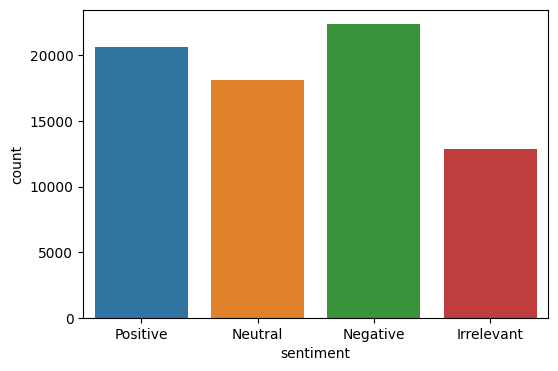

In [12]:
# plot sentiment graph

plt.figure(figsize=(6,4))
sns.countplot(x='sentiment',data=df)

In [13]:
fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.tweet_id,
    title = {"text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [14]:
# remove punctuation

df.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [15]:
df.head()

,tweet_id,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands and i will murder ...


In [16]:
columns = df.columns[1::] # only string columns

In [17]:
# convert to lower case

for col in columns:
    df[col] = df[col].str.lower()
df.head(1)

,tweet_id,entity,sentiment,tweet_content
0,2401,borderlands,positive,im getting on borderlands and i will murder yo...


In [18]:
# give numerical label for easy prediction

df['sentiment'] = df['sentiment'].map({'negative': 0, 'positive': 1, 'neutral' : 2, 'irrelevant' : 3})

In [19]:
df.head(1)

,tweet_id,entity,sentiment,tweet_content
0,2401,borderlands,1,im getting on borderlands and i will murder yo...


In [20]:
 # join the  entity & tweet_content for apply CountVectorizer

df['tweet'] = df['entity'] + ' ' + df['tweet_content']

In [21]:
df.head()

,tweet_id,entity,sentiment,tweet_content,tweet
0,2401,borderlands,1,im getting on borderlands and i will murder yo...,borderlands im getting on borderlands and i wi...
1,2401,borderlands,1,i am coming to the borders and i will kill you...,borderlands i am coming to the borders and i w...
2,2401,borderlands,1,im getting on borderlands and i will kill you ...,borderlands im getting on borderlands and i wi...
3,2401,borderlands,1,im coming on borderlands and i will murder you...,borderlands im coming on borderlands and i wil...
4,2401,borderlands,1,im getting on borderlands and i will murder ...,borderlands im getting on borderlands and i ...


In [22]:
# drop unnecessary column

df.drop(columns=['tweet_id', 'entity', 'tweet_content'], inplace=True)

In [23]:
df.head(1)

,sentiment,tweet
0,1,borderlands im getting on borderlands and i wi...


#### **Model**

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [25]:
countvector = CountVectorizer(ngram_range=(2, 2))

In [26]:
# fit the train data

traindataset = countvector.fit_transform(df['tweet'])

In [27]:
# its return sparse matrix

traindataset

<73996x305576 sparse matrix of type '<class 'numpy.int64'>'
	with 1313613 stored elements in Compressed Sparse Row format>

In [28]:
randomclassifier = RandomForestClassifier(n_estimators=200, criterion='entropy')
randomclassifier.fit(traindataset, df['sentiment'])

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [29]:
# save model

import pickle

model_pkl_file = "/kaggle/working/sentiment_analysis_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(randomclassifier, file)

# Test Dataset

In [30]:
name = ['tweet_id', 'entity', 'sentiment', 'tweet_content']
df = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv', names=name)

In [31]:
df.head()

,tweet_id,entity,sentiment,tweet_content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [32]:
df.isnull().sum()

tweet_id         0
entity           0
sentiment        0
tweet_content    0
dtype: int64

In [33]:
df.shape

(1000, 4)

In [34]:
# remove punctuation

df.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [35]:
df.head()

,tweet_id,entity,sentiment,tweet_content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,Microsoft Why do I pay for WORD when it funct...
3,4371,CS GO,Negative,CSGO matchmaking is so full of closet hacking ...
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [36]:
df['tweet'] = df['entity'] + ' ' + df['tweet_content'] # combination of entity and tweet content

In [37]:
df.head(1)

,tweet_id,entity,sentiment,tweet_content,tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,Facebook I mentioned on Facebook that I was st...


In [38]:
df.drop(columns=['entity','tweet_id','tweet_content'],inplace=True)

In [39]:
df

,sentiment,tweet
0,Irrelevant,Facebook I mentioned on Facebook that I was st...
1,Neutral,Amazon BBC News Amazon boss Jeff Bezos rejec...
2,Negative,Microsoft Microsoft Why do I pay for WORD whe...
3,Negative,CS GO CSGO matchmaking is so full of closet ha...
4,Neutral,Google Now the President is slapping Americans...
...,...,...
995,Irrelevant,GrandTheftAuto GTA Toronto is the arts and...
996,Irrelevant,CS GO tHIS IS ACTUALLY A GOOD MOVE TOT BRING M...
997,Positive,Borderlands Today sucked so it s time to drink...
998,Positive,Microsoft Bought a fraction of Microsoft today...


In [40]:
for col in df.columns:
    df[col] = df[col].str.lower()# convert to lower case
df.head(1)

,sentiment,tweet
0,irrelevant,facebook i mentioned on facebook that i was st...


In [41]:
df['sentiment'] = df['sentiment'].map({'negative': 0, 'positive': 1, 'neutral' : 2, 'irrelevant' : 3})

In [42]:
df.head()

,sentiment,tweet
0,3,facebook i mentioned on facebook that i was st...
1,2,amazon bbc news amazon boss jeff bezos rejec...
2,0,microsoft microsoft why do i pay for word whe...
3,0,cs go csgo matchmaking is so full of closet ha...
4,2,google now the president is slapping americans...


In [43]:
val_data = countvector.transform(df['tweet'])

In [44]:
with open('/kaggle/working/sentiment_analysis_model.pkl', 'rb') as file:  
    model = pickle.load(file)

In [45]:
model

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [46]:
y_predict = model.predict(val_data)

In [47]:
y_predict

array([3, 2, 0, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 1, 0, 0, 2,
       2, 0, 2, 2, 0, 0, 3, 0, 1, 1, 0, 1, 0, 2, 2, 3, 1, 2, 1, 2, 2, 2,
       1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 3, 0, 1, 1, 3, 0, 2,
       0, 3, 2, 0, 1, 0, 0, 1, 1, 3, 1, 3, 2, 2, 2, 1, 1, 2, 1, 2, 0, 3,
       0, 2, 2, 2, 1, 3, 3, 0, 0, 0, 0, 1, 2, 0, 1, 1, 2, 1, 2, 1, 0, 2,
       2, 2, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 2, 0, 2, 3, 1,
       2, 1, 1, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 1, 2, 1, 3, 1, 0, 2, 2,
       2, 3, 2, 0, 1, 1, 0, 2, 0, 3, 3, 3, 2, 0, 0, 0, 1, 1, 1, 2, 2, 1,
       3, 2, 2, 2, 1, 2, 0, 0, 2, 1, 1, 3, 3, 2, 1, 1, 2, 3, 2, 0, 0, 0,
       0, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 3, 2, 3, 0, 1, 3, 1, 0, 1, 1, 0,
       3, 0, 1, 1, 0, 3, 3, 1, 1, 0, 1, 3, 2, 3, 3, 0, 2, 2, 1, 0, 3, 3,
       1, 1, 3, 3, 2, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 0, 2, 1, 2, 0, 2, 1,
       0, 1, 1, 3, 0, 2, 3, 1, 2, 3, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1,
       0, 2, 0, 1, 0, 1, 0, 3, 2, 2, 1, 0, 2, 0, 3,

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [49]:
matrix = confusion_matrix(df['sentiment'], y_predict)
matrix

array([[253,   9,   4,   0],
       [  0, 271,   5,   1],
       [  4,   8, 273,   0],
       [  1,   3,   1, 167]])

In [50]:
report = classification_report(df['sentiment'], y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       266
           1       0.93      0.98      0.95       277
           2       0.96      0.96      0.96       285
           3       0.99      0.97      0.98       172

    accuracy                           0.96      1000
   macro avg       0.97      0.96      0.97      1000
weighted avg       0.96      0.96      0.96      1000



In [51]:
accuracy = accuracy_score(df['sentiment'], y_predict)
print("Accuracy : ",accuracy*100,"%")

Accuracy :  96.39999999999999 %


In [52]:
prediction = pd.DataFrame({
    'Actual' : df['sentiment'],
    "Predicted" : y_predict
})

In [53]:
prediction.to_csv('/kaggle/working/prediction.csv')

In [54]:
prediction

,Actual,Predicted
0,3,3
1,2,2
2,0,0
3,0,0
4,2,2
...,...,...
995,3,3
996,3,3
997,1,1
998,1,1


In [55]:
# line = [input('Enter  line : ')]
# data = countvector.transform(line)
# pred = model.predict(data)
# print()
# print("Your Input is : ",line)
# print()
# if pred == 0:
#     print('Predicted is Negative Sentence')
# elif pred == 1:
#     print('Predicted is Positive Sentence')
# elif pred == 2:
#     print('Predicted is Neutral Sentence')
# elif pred == 3:
#     print('Predicted is Irrelevent Sentence')
# else:
#     print('\nPredicted is Unknown...')